## 6.5 Unsupervised Machine Learning - Clustering 

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Assigning the folder path to a variable
path = r"C:\Users\Toshiba\26-12-2023 Superstore Sales Analysis"

In [5]:
# Importing dataframe

sales = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Superstore_profit_sale_discount_year_col_add.csv'))

In [6]:
sales.shape

(9994, 25)

In [7]:
sales.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profit_type,Sale_category,Discount_applied,Year
0,0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Positive Profit,High Sale,No,2016
1,1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Positive Profit,High Sale,No,2016
2,2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Positive Profit,High Sale,No,2016
3,3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Negative Profit,High Sale,Yes,2015
4,4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Positive Profit,High Sale,Yes,2015


In [8]:
# Delete unnecessary columns
sales = sales.drop(columns=['Unnamed: 0'])

In [9]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profit_type,Sale_category,Discount_applied,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Positive Profit,High Sale,No,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Positive Profit,High Sale,No,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Positive Profit,High Sale,No,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Negative Profit,High Sale,Yes,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Positive Profit,High Sale,Yes,2015


In [10]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'profit_type',
       'Sale_category', 'Discount_applied', 'Year'],
      dtype='object')

In [34]:
# Create a subset which are needed for analysis

sales_sub = sales[['Sales', 'Quantity', 'Discount', 'Profit']]

In [35]:
sales_sub.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

### 2. The elbow technique

In [36]:
 # Defines the range of potential clusters in the data.
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [37]:
score = [kmeans[i].fit(sales_sub).score(sales_sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Toshiba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Toshiba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Toshiba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Toshiba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

[-4430069250.260384,
 -2466689485.4461737,
 -1444371627.8233519,
 -1009021756.5951241,
 -815986576.6746088,
 -660372419.4367639,
 -548789010.9119174,
 -458540403.8477798,
 -386281292.9493573]

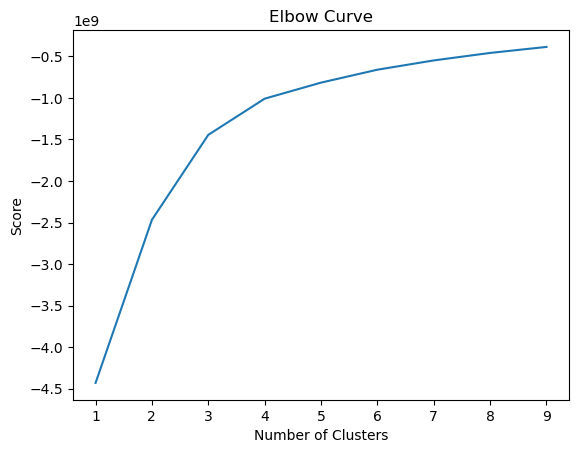

In [38]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The elbow (the breaking point of the curve) is where the curve begins to flatten. In this case, we can observe that it jumps from three to four on the X-axis and then increases slightly after four. That's why I believe that the optimal number of clusters is four.

### 3. k-means clustering

In [39]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [40]:
# Fit the k-means object to the data.

kmeans.fit(sales_sub)

C:\Users\Toshiba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [41]:
sales_sub['clusters'] = kmeans.fit_predict(sales_sub)

C:\Users\Toshiba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_5564\1198141073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_sub['clusters'] = kmeans.fit_predict(sales_sub)


In [42]:
sales_sub.head()

,Sales,Quantity,Discount,Profit,clusters
0,261.9600,2,0.00,41.9136,0
1,731.9400,3,0.00,219.5820,3
2,14.6200,2,0.00,6.8714,0
3,957.5775,5,0.45,-383.0310,3
4,22.3680,2,0.20,2.5164,0


In [43]:
sales_sub['clusters'].value_counts()

clusters
0    8898
3     974
2     112
1      10
Name: count, dtype: int64

#### Scatterplots

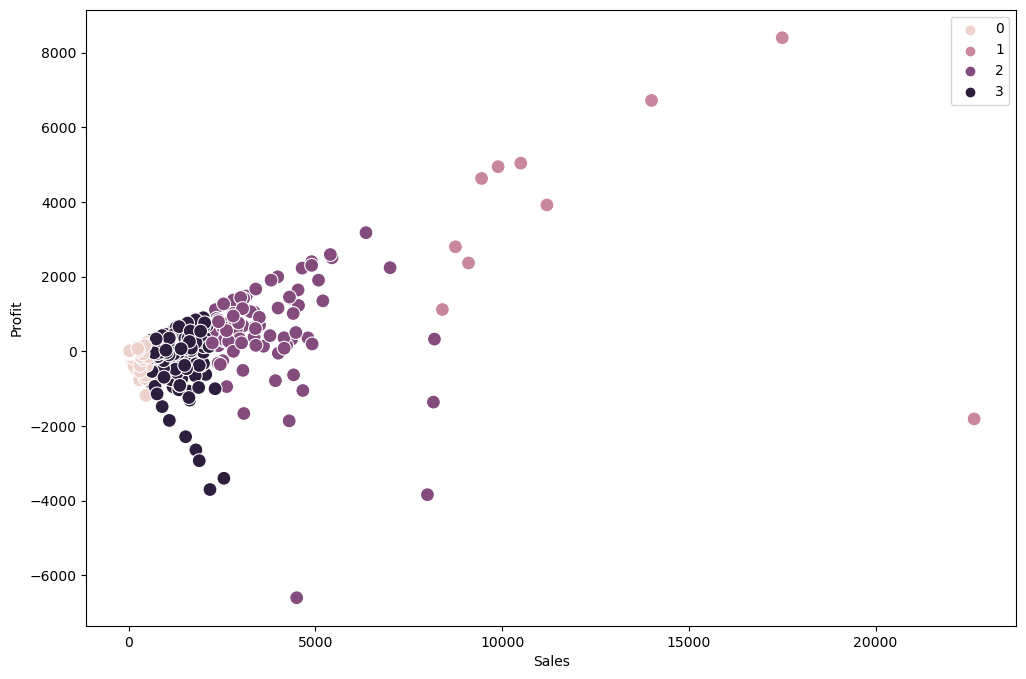

In [44]:
# Plot the clusters for the "Sales" and "Profit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sales_sub['Sales'], y=sub['Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sales') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.show()

#### Conclusions

The findings suggest that the purple cluster (Cluster Number 2) has the highest sales and the profits.Only one point here gives nagative profit. In other clusters, there are many points for the negative profits.The dark purple cluster (cluster number 3) has the lowest sales and also there are more pointsin negative for profit.I think, these clusters represent different levels of sales happening.

In [45]:
sub.loc[sub['clusters'] == 3, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'light purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

In [46]:
sub.groupby('cluster').agg({'Sales':['mean', 'median'], 
                         'Profit':['mean', 'median'], 
                         'Discount':['mean', 'median']})

Sales                  Profit              Discount  \
                      mean     median         mean      median      mean   
cluster                                                                    
dark purple      96.202497     41.568    10.897528     7.40000  0.158004   
light purple   3418.757059   2956.625   572.424873   624.07970  0.120268   
pink            960.980084    844.116    89.434330   111.30240  0.144369   
purple        12143.087400  10196.355  3813.166090  4275.23215  0.110000   

                     
             median  
cluster              
dark purple     0.2  
light purple    0.1  
pink            0.2  
purple          0.0

#### Conclusions

Based on these statistics, it appears that the Purple Cluster had the most sales and the profits than the other clusters even though the discounts were the lowest for this group of clusters.
This Purple Cluster also exhibits slightly larger differences between the mean and median values, indicating slightly more variability within those clusters for some indicators.


All other clusters have relatively same difference between the mean and median values across all indicators.

#### What could these results be useful for?

The inconsistency within clusters can be used for anomaly detection. If some data points within a cluster significantly deviate from the cluster's mean or median, it could signal unusual cases that require further investigation. This can prompt additional analysis and  new hypothesis.

The findings can help better understand the characteristics of each cluster. 
Within the realm social or public policy, understanding cluster's differences can inform targeted investigations, interventions, or support efforts.

In the context of business and marketing, organizations can use these results to make critical decisions concerning company expansion, product development, and resource allocation.

In general the results of cluster analysis can be a foundation for a wide range of applications and decision-making processes in various domains, including business, marketing, public policy, healthcare.